<a href="https://colab.research.google.com/github/juvi-coder/Census-Data-Modelling/blob/main/Income%20Classification%20Models%20based%20Census%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income Classification based on the Census Data

#Exploratory Analysis

*  Importing the required packages.
*  Loading the data. Understanding the data.
*  Feature Engineering











In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None) # spaces cols out nicely in pd
df_train = pd.read_csv('census-income.data.csv')
df_test = pd.read_csv('census-income.test.csv')

new_names = {"detailed industry recode" : "industry_code_detailed"
, "detailed occupation recode" : "occupation_code_detailed"
, "marital stat" : "marital_status"
, "wage per hour" : "hourly_wage"
, "enroll in edu inst last wk" : "enrolled_in_education"
, "major industry code" : "industry_code_major"
, "major occupation code" : "occupation_code_major"
, "hispanic origin" : "hispanic_origin"
, "member of a labor union" : "labor_union"
, "reason for unemployment" : "unemployment_reason"
, "full or part time employment stat" : "employment_status"
, "capital gains" : "capital_gains"
, "capital losses" : "capital_losses"
, "dividends from stocks" : "stock_dividends"
, "own business or self employed" : "business_owner"
, "veterans benefits" : "veterans_benefits"
, "family members under 18" : "f_under_18"
, "live in this house 1 year ago" : "same_house_1_year"
, "sex" : "male"
, "class of worker" : 'class_of_worker'
}
df_train.rename(columns={'hispanic_origin':"race_Hispanic"}, inplace=True)

# Remove leading/trailing whitespace from str values & renaming some useful cols
df_train = df_train.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_train = df_train.rename(columns=new_names)
df_train.rename(columns={'hispanic_origin':"race_Hispanic"}, inplace=True)

df_test = df_test.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_test = df_test.rename(columns=new_names)
df_test.rename(columns={'hispanic_origin':"race_Hispanic"}, inplace=True)

#EDA


*   Shape of the inital data sets.
*   EDA 



In [ ]:
print(df_train.shape, df_test.shape)
print(len(df_train) + len(df_test))

(199523, 42) (99762, 42)
299285


In [ ]:
print( df_train.info(), df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class_of_worker                             199523 non-null  object 
 2   industry_code_detailed                      199523 non-null  int64  
 3   occupation_code_detailed                    199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   hourly_wage                                 199523 non-null  int64  
 6   enrolled_in_education                       199523 non-null  object 
 7   marital_status                              199523 non-null  object 
 8   industry_code_major                         199523 non-null  object 
 9   occupation_code_major                       199523 non-null  object 
 

In [ ]:
# Checking NAs by column & Useful drop function

df_train.isna().sum()
df_test.isna().sum()

# below is TO DROP MISSING VALUES!
# data = data[~data.age.isnull()].copy()

# No NAs in either dataset, however we do have 'not in universe' values -- these are basically NAs since they provide no info

age                                           0
class_of_worker                               0
industry_code_detailed                        0
occupation_code_detailed                      0
education                                     0
hourly_wage                                   0
enrolled_in_education                         0
marital_status                                0
industry_code_major                           0
occupation_code_major                         0
race                                          0
race_Hispanic                                 0
male                                          0
labor_union                                   0
unemployment_reason                           0
employment_status                             0
capital_gains                                 0
capital_losses                                0
stock_dividends                               0
tax filer stat                                0
region of previous residence            

In [ ]:
# Unique Values by Column
for col in df_train:
    print(col,'->', df_train[col].unique(), '\n')

age -> [73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88] 

class_of_worker -> ['Not in universe' 'Self-employed-not incorporated' 'Private'
 'Local government' 'Federal government' 'Self-employed-incorporated'
 'State government' 'Never worked' 'Without pay'] 

industry_code_detailed -> [ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10] 

occupation_code_detailed -> [ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46] 

education -> ['High school graduate' 'Some college but no degree' '10th grade'
 'Children' 'Bachelors degree(BA AB BS)'
 'Masters degree(MA MS MEng 

In [ ]:
objs = 0
nums = 0

for col in df_train:
  if df_train[col].dtype == 'object':
    objs +=1
  else:
    nums +=1

print(f'Count of Object Columns- {objs}')
print(f'Count of Numerical Columns- {nums}')

Count of Object Columns- 29
Count of Numerical Columns- 13


In [ ]:
p# Examining Distribution of numerics -- look @ top 3 cases in objects? order by frequency of occurance?
obj_df = df_train.select_dtypes(include=['object']).copy()
num_df = df_train.select_dtypes(include=['int64', 'float64']).copy()

num_df.describe()

,age,industry_code_detailed,occupation_code_detailed,hourly_wage,capital_gains,capital_losses,stock_dividends,| instance weight,migration prev res in sunbelt,citizenship,fill inc questionnaire for veteran's admin,veterans_benefits,weeks worked in year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


Text(0.5, 1.0, 'Age Distributions Before & After Filtering')

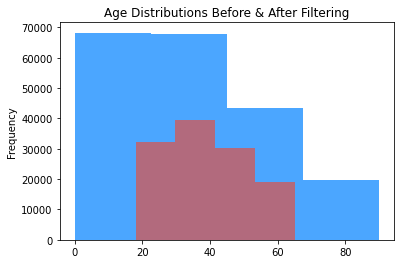

In [ ]:
# Plot histogram for a column -- accessing df_train
df_train['age'].plot.hist(bins=4, color='dodgerblue', alpha=.8)
a = df_train[df_train['age'] >= 18]
a = a[a['age'] <= 65]
a['age'].plot.hist(bins=4, color='indianred', alpha=.8)
plt.title('Age Distributions Before & After Filtering')



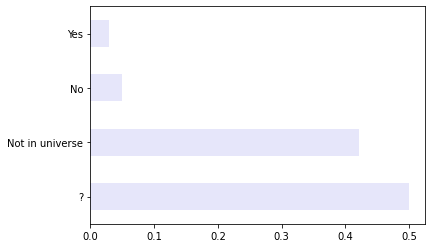

In [ ]:
# Examining same house var
obj_df['same_house_1_year'].value_counts(normalize=True).plot.barh(color='lavender')

Not in universe                   0.502423
Private                           0.361001
Self-employed-not incorporated    0.042326
Local government                  0.039013
State government                  0.021186
Self-employed-incorporated        0.016364
Federal government                0.014660
Never worked                      0.002200
Without pay                       0.000827
Name: class_of_worker, dtype: float64


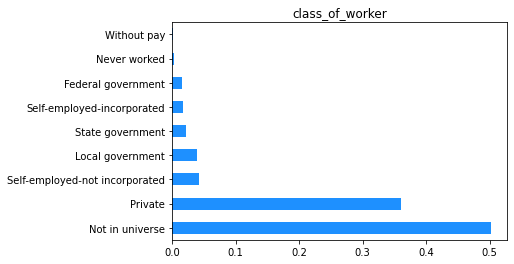

High school graduate                      0.242614
Children                                  0.237677
Some college but no degree                0.139433
Bachelors degree(BA AB BS)                0.099562
7th and 8th grade                         0.040131
10th grade                                0.037875
11th grade                                0.034462
Masters degree(MA MS MEng MEd MSW MBA)    0.032783
9th grade                                 0.031224
Associates degree-occup /vocational       0.026854
Associates degree-academic program        0.021867
5th or 6th grade                          0.016424
12th grade no diploma                     0.010655
1st 2nd 3rd or 4th grade                  0.009017
Prof school degree (MD DDS DVM LLB JD)    0.008986
Doctorate degree(PhD EdD)                 0.006330
Less than 1st grade                       0.004105
Name: education, dtype: float64


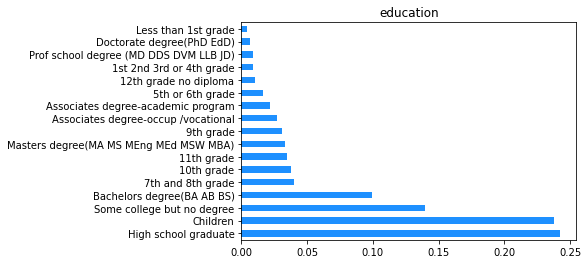

Not in universe          0.936950
High school              0.034542
College or university    0.028508
Name: enrolled_in_education, dtype: float64


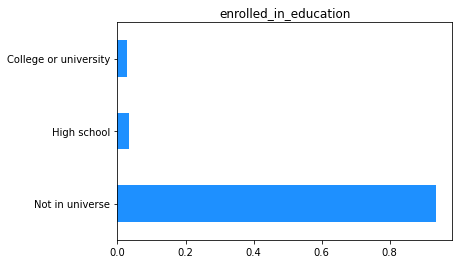

Never married                      0.433459
Married-civilian spouse present    0.422117
Divorced                           0.063702
Widowed                            0.052440
Separated                          0.017341
Married-spouse absent              0.007608
Married-A F spouse present         0.003333
Name: marital_status, dtype: float64


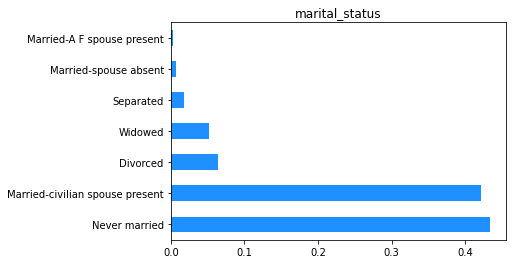

Not in universe or children            0.504624
Retail trade                           0.085554
Manufacturing-durable goods            0.045183
Education                              0.041514
Manufacturing-nondurable goods         0.034567
Finance insurance and real estate      0.030798
Construction                           0.029992
Business and repair services           0.028323
Medical except hospital                0.023471
Public administration                  0.023105
Other professional services            0.022464
Transportation                         0.021095
Hospital services                      0.019867
Wholesale trade                        0.018023
Agriculture                            0.015151
Personal services except private HH    0.014720
Social services                        0.012775
Entertainment                          0.008275
Communications                         0.005919
Utilities and sanitary services        0.005904
Private household services             0

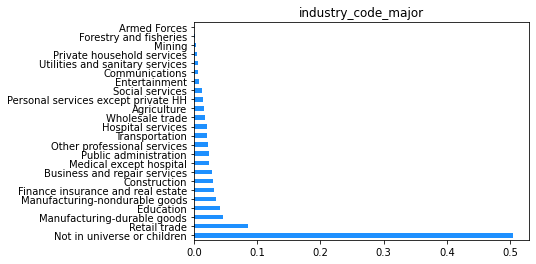

Not in universe                          0.504624
Adm support including clerical           0.074362
Professional specialty                   0.069867
Executive admin and managerial           0.062624
Other service                            0.060640
Sales                                    0.059056
Precision production craft & repair      0.052716
Machine operators assmblrs & inspctrs    0.031971
Handlers equip cleaners etc              0.020684
Transportation and material moving       0.020148
Farming forestry and fishing             0.015768
Technicians and related support          0.015126
Protective services                      0.008325
Private household services               0.003909
Armed Forces                             0.000180
Name: occupation_code_major, dtype: float64


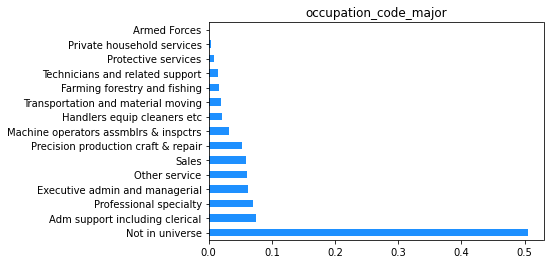

White                          0.838826
Black                          0.102319
Asian or Pacific Islander      0.029245
Other                          0.018329
Amer Indian Aleut or Eskimo    0.011282
Name: race, dtype: float64


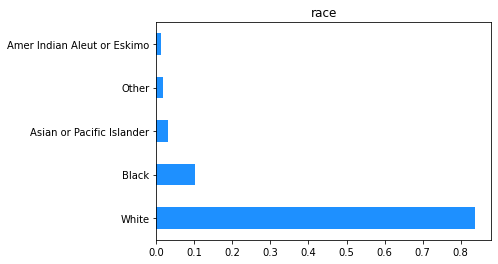

All other                    0.861590
Mexican-American             0.040492
Mexican (Mexicano)           0.036256
Central or South American    0.019522
Puerto Rican                 0.016605
Other Spanish                0.012455
Cuban                        0.005643
NA                           0.004380
Do not know                  0.001534
Chicano                      0.001524
Name: race_Hispanic, dtype: float64


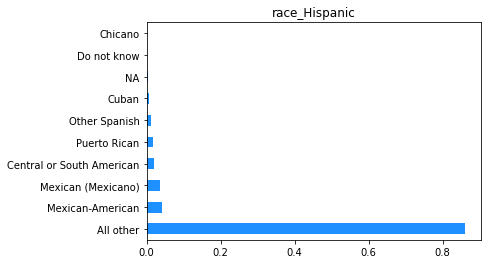

Female    0.521163
Male      0.478837
Name: male, dtype: float64


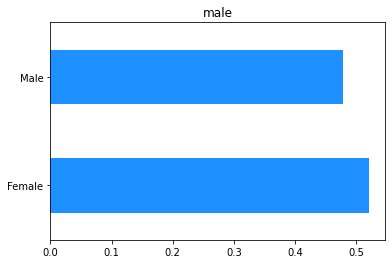

Not in universe    0.904452
No                 0.080362
Yes                0.015186
Name: labor_union, dtype: float64


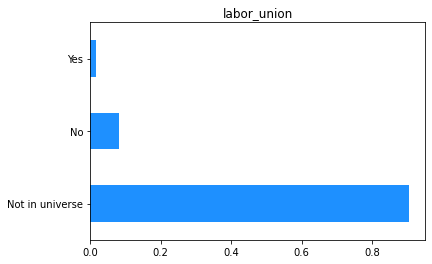

Not in universe          0.969577
Other job loser          0.010214
Re-entrant               0.010119
Job loser - on layoff    0.004892
Job leaver               0.002997
New entrant              0.002200
Name: unemployment_reason, dtype: float64


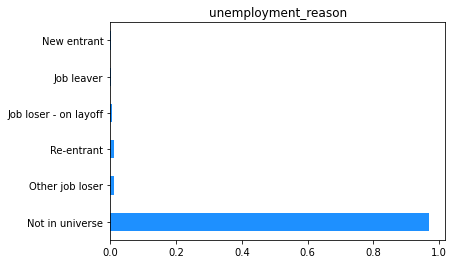

Children or Armed Forces              0.620324
Full-time schedules                   0.204167
Not in labor force                    0.134360
PT for non-econ reasons usually FT    0.016650
Unemployed full-time                  0.011583
PT for econ reasons usually PT        0.006059
Unemployed part- time                 0.004225
PT for econ reasons usually FT        0.002631
Name: employment_status, dtype: float64


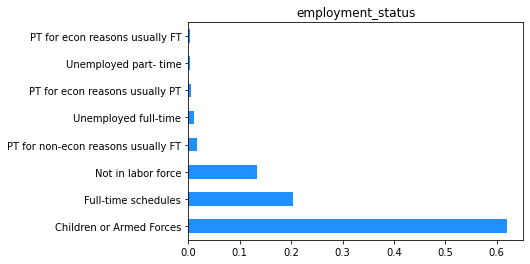

Nonfiler                        0.376368
Joint both under 65             0.337720
Single                          0.187552
Joint both 65+                  0.041760
Head of household               0.037219
Joint one under 65 & one 65+    0.019381
Name: tax filer stat, dtype: float64


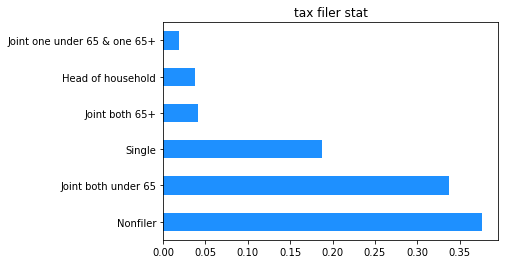

Not in universe    0.920946
South              0.024503
West               0.020419
Midwest            0.017918
Northeast          0.013557
Abroad             0.002656
Name: region of previous residence, dtype: float64


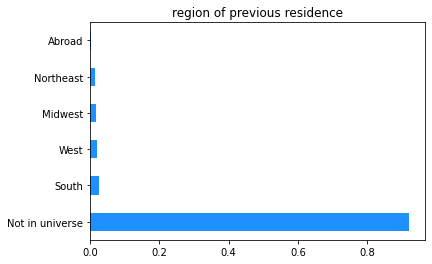

Not in universe         0.920946
California              0.008590
Utah                    0.005328
Florida                 0.004255
North Carolina          0.004070
?                       0.003548
Abroad                  0.003363
Oklahoma                0.003137
Minnesota               0.002887
Indiana                 0.002671
North Dakota            0.002501
New Mexico              0.002321
Michigan                0.002210
Alaska                  0.001453
Kentucky                0.001223
Arizona                 0.001218
New Hampshire           0.001213
Wyoming                 0.001208
Colorado                0.001198
Oregon                  0.001183
West Virginia           0.001158
Georgia                 0.001138
Montana                 0.001133
Alabama                 0.001083
Ohio                    0.001058
Texas                   0.001047
Arkansas                0.001027
Mississippi             0.001022
Tennessee               0.001012
Pennsylvania            0.000997
New York  

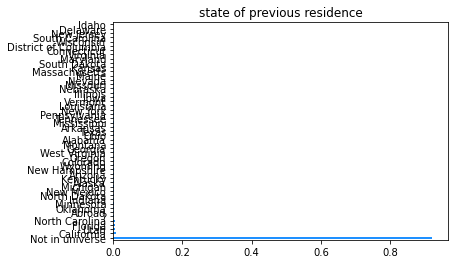

Householder                                        0.266877
Child <18 never marr not in subfamily              0.252232
Spouse of householder                              0.208973
Nonfamily householder                              0.111331
Child 18+ never marr Not in a subfamily            0.060294
Secondary individual                               0.030683
Other Rel 18+ ever marr not in subfamily           0.009803
Grandchild <18 never marr child of subfamily RP    0.009362
Other Rel 18+ never marr not in subfamily          0.008661
Grandchild <18 never marr not in subfamily         0.005343
Child 18+ ever marr Not in a subfamily             0.005077
Child under 18 of RP of unrel subfamily            0.003669
RP of unrelated subfamily                          0.003433
Child 18+ ever marr RP of subfamily                0.003363
Other Rel <18 never marr child of subfamily RP     0.003288
Other Rel 18+ ever marr RP of subfamily            0.003288
Other Rel 18+ spouse of subfamily RP    

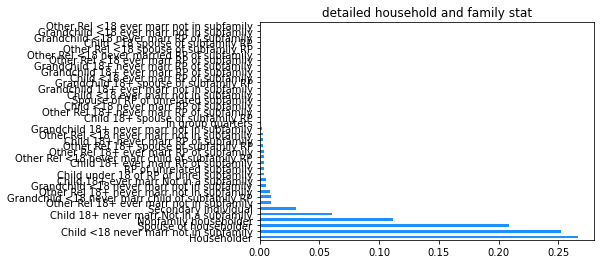

Householder                             0.378277
Child under 18 never married            0.252733
Spouse of householder                   0.209044
Child 18 or older                       0.072322
Other relative of householder           0.048631
Nonrelative of householder              0.038096
Group Quarters- Secondary individual    0.000662
Child under 18 ever married             0.000236
Name: detailed household summary in household, dtype: float64


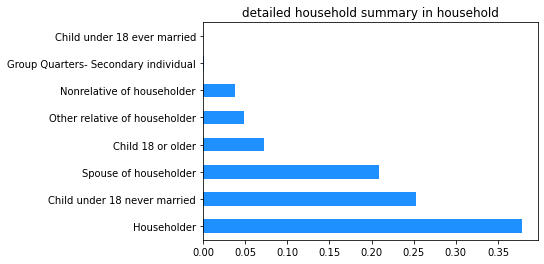

?                   0.499672
Nonmover            0.413677
MSA to MSA          0.053132
NonMSA to nonMSA    0.014089
Not in universe     0.007598
MSA to nonMSA       0.003959
NonMSA to MSA       0.003082
Abroad to MSA       0.002270
Not identifiable    0.002155
Abroad to nonMSA    0.000366
Name: instance weight, dtype: float64


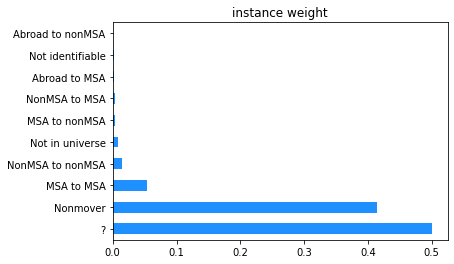

?                                 0.499672
Nonmover                          0.413677
Same county                       0.049177
Different county same state       0.014018
Not in universe                   0.007598
Different region                  0.005904
Different state same division     0.004967
Abroad                            0.002656
Different division same region    0.002331
Name: migration code-change in msa, dtype: float64


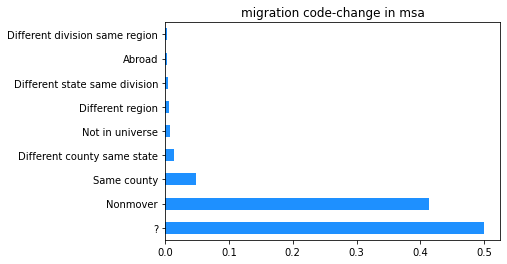

?                               0.499672
Nonmover                        0.413677
Same county                     0.049177
Different county same state     0.014018
Not in universe                 0.007598
Different state in South        0.004877
Different state in West         0.003403
Different state in Midwest      0.002762
Abroad                          0.002656
Different state in Northeast    0.002160
Name: migration code-change in reg, dtype: float64


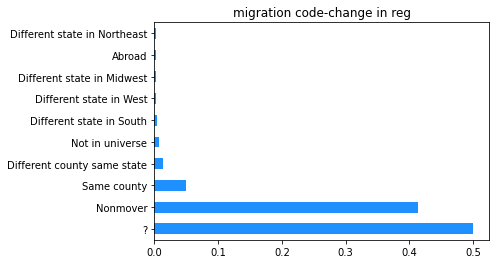

Not in universe under 1 year old    0.507270
Yes                                 0.413677
No                                  0.079054
Name: migration code-move within reg, dtype: float64


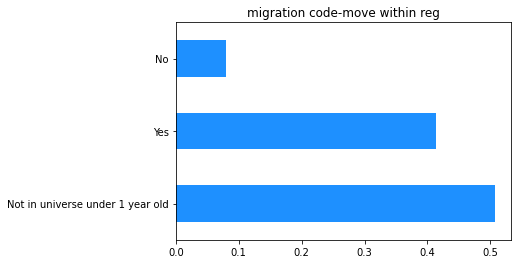

?                  0.499672
Not in universe    0.421275
No                 0.050054
Yes                0.028999
Name: same_house_1_year, dtype: float64


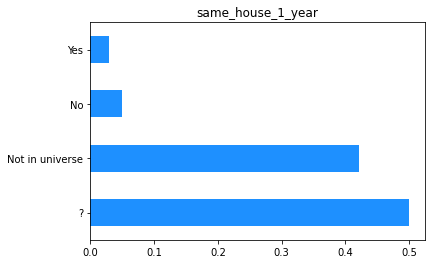

Not in universe           0.722884
Both parents present      0.195381
Mother only present       0.064013
Father only present       0.009438
Neither parent present    0.008285
Name: num persons worked for employer, dtype: float64


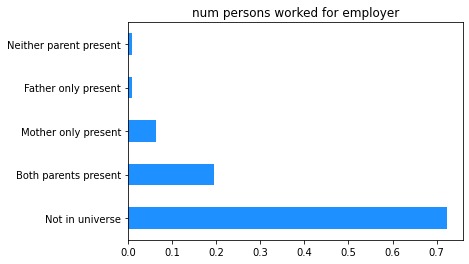

United-States                   0.797718
Mexico                          0.050160
?                               0.033645
Puerto-Rico                     0.013432
Italy                           0.011086
Canada                          0.006916
Germany                         0.006796
Dominican-Republic              0.006465
Poland                          0.006074
Philippines                     0.005784
Cuba                            0.005638
El-Salvador                     0.004922
China                           0.004290
England                         0.003974
Columbia                        0.003077
India                           0.002907
South Korea                     0.002656
Ireland                         0.002546
Jamaica                         0.002321
Vietnam                         0.002290
Guatemala                       0.002230
Japan                           0.001965
Portugal                        0.001945
Ecuador                         0.001900
Haiti           

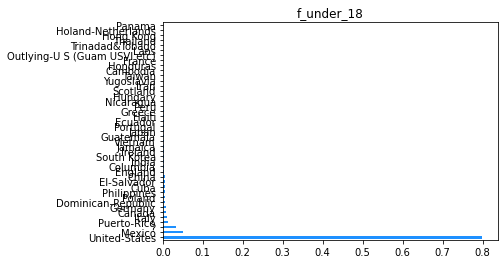

United-States                   0.804313
Mexico                          0.049022
?                               0.030668
Puerto-Rico                     0.012395
Italy                           0.009242
Canada                          0.007272
Germany                         0.006927
Philippines                     0.006170
Poland                          0.005563
El-Salvador                     0.005553
Cuba                            0.005553
Dominican-Republic              0.005528
England                         0.004526
China                           0.003809
Columbia                        0.003067
South Korea                     0.003052
Ireland                         0.003002
India                           0.002912
Vietnam                         0.002371
Japan                           0.002351
Jamaica                         0.002270
Guatemala                       0.002225
Ecuador                         0.001879
Peru                            0.001779
Haiti           

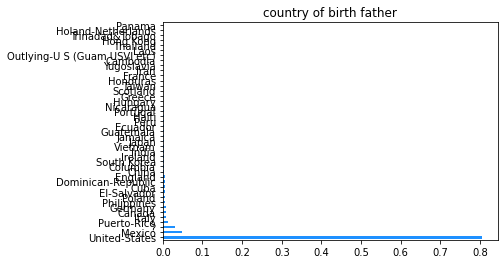

United-States                   0.887061
Mexico                          0.028904
?                               0.017006
Puerto-Rico                     0.007017
Germany                         0.004265
Philippines                     0.004235
Cuba                            0.004195
Canada                          0.003508
Dominican-Republic              0.003458
El-Salvador                     0.003453
China                           0.002396
South Korea                     0.002361
England                         0.002290
Columbia                        0.002175
Italy                           0.002100
India                           0.002045
Vietnam                         0.001960
Poland                          0.001910
Guatemala                       0.001724
Japan                           0.001699
Jamaica                         0.001604
Peru                            0.001343
Ecuador                         0.001293
Haiti                           0.001143
Nicaragua       

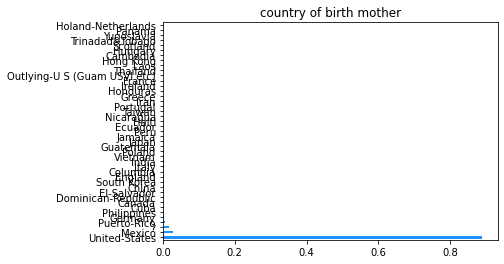

Native- Born in the United States              0.887076
Foreign born- Not a citizen of U S             0.067165
Foreign born- U S citizen by naturalization    0.029345
Native- Born abroad of American Parent(s)      0.008801
Native- Born in Puerto Rico or U S Outlying    0.007613
Name: country of birth self, dtype: float64


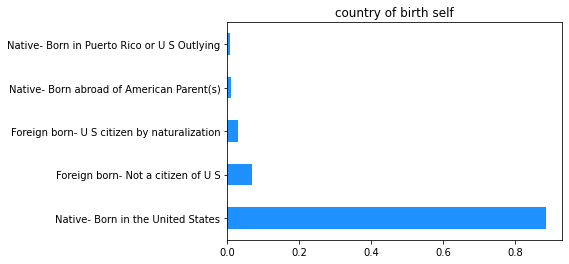

Not in universe    0.990056
No                 0.007984
Yes                0.001960
Name: business_owner, dtype: float64


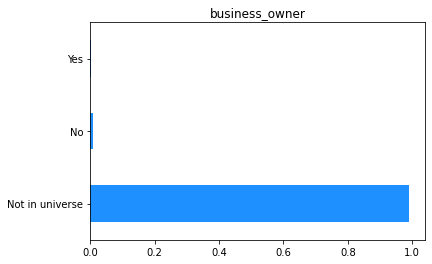

-50000     0.937942
50000+.    0.062058
Name: annual_salary, dtype: float64


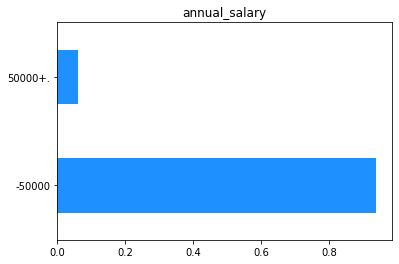

In [ ]:
# Examine distribution of people in all of Object/Categorical variables -- only looking at obj_df!
for col in obj_df:
    p = obj_df[col].value_counts(normalize=True)
    print(p)

    #plot the bar graph of percentage job categories
    obj_df[col].value_counts(normalize=True).plot.barh(color = 'dodgerblue')
    plt.title(col)
    plt.show()

In [ ]:
# Duplicates Analysis
dupes = obj_df[obj_df.duplicated()]
print(len(dupes), len(obj_df))

dupes1 = df_train[df_train.duplicated()]
print(len(dupes1), len(df_train))

102947 199523
3229 199523


#Feature Engineering 


## ReEncoding Variables

- marital_status: convert into a 0, 1, 2 scale (based on distribution of values) -- where 0=never married, 1=married & present, 2=separated/divourced/married but absent
- class_of_worker: concate self employment, and governments? -- 4 vars: 0=?, 1=self, 2=gov, 3=priv
- education: n vars: 0=up to 8th grade, 1=some_highschool, 2=full_highschool, 3=some_uni, 4=full_uni, 5=postgraduate_uni
- enrolled_in_education: convert to 0, 1 (for no, yes respectively)
- business_owner: convert to a 0, 1 based on if the person owns their own business?
- labor_union: convert all 'Not in universe' to no -- change to 0, 1 for not in union and in union respectively
- employment_status: convert to nums -- 0:unemployed, 1:part-time, 2:full-time
- citizenship: native US citizens are listed as zero, other groups that are not yet citizens are either 1 or 2 -- convert to 0 being the old 1 or 2 and all 0s into 1 (so that interpreting variable is citizenship=1 they are a US citizen)
- annual_salary: 0, 1 for makes less than 50k & more than 50k respectively
- business_owner: 0, 1 for is not or is owner
- race_Hispanic: convert to a 0, 1 (no or yes) variable? -- integrate with other 'race' variable?
- race: one hot encoded -- matches with race_Hispanic var
- male: 0=female, 1=male
- 'capital gains' & 'capital losses': combined to make 'capital_position' (gains - losses) describes net position year




# Clean Up data -- prep for ML Applications

- drop nonsensical or useless coloumns
- Re-encode variables? -- depends on model / goal but some categorical / object type vars need to be ordered and or changed
- large proportion of individuals are below or above typical working age -- will change to 18-65 (typical working years!)
- What do with all of 'not in universe' variables? (Essentially NAs written into data) Dropped them for now 

- We have a label imbalance in our dependent variable! many more people make less than 50k -- these could be minors or individuals that are not working however! 

In [ ]:
# Creating cleanup function to prep data for modelling
worker_class_to_cut = ['Without pay', 'Never worked', 'Not in universe']
cols_to_drop = ['| instance weight' #this col would be used for a business application, not important for our purposes -- will delete
                 , 'instance weight' #same as above
                 , 'industry_code_major' #detailed provides number -- this is actual topic related to a num
                 , 'occupation_code_major' #detailed provides number -- this is actual topic related to a num
                 , "f_under_18" #citizenship / ethnicity covers -- nonessential for our prediction purposes
                 , 'country of birth father' #citizenship / ethnicity covers -- nonessential for our prediction purposes
                 , 'country of birth mother' #citizenship / ethnicity covers -- nonessential for our prediction purposes
                 , 'country of birth self' #citizenship / ethnicity covers -- nonessential for our prediction purposes
                 , 'weeks worked in year' #No variance variable? -- Examine it's distribution as compared to dependent variable!(most likely not worth keeping in)
                 , 'num persons worked for employer' #not useful? 
                 , 'region of previous residence' #Not useful?
                 , 'state of previous residence' #Not useful?
                 , 'detailed household and family stat'
                 , "fill inc questionnaire for veteran's admin"
                 , 'migration code-move within reg' #not useful?
                 , 'migration prev res in sunbelt' #not useful?

                 # Variables worth exploring -- may add back in later depending on model performance
                 , 'same_house_1_year'
                 , 'migration code-change in msa'
                 , 'migration code-change in reg'
                 , 'detailed household summary in household'
                 , 'unemployment_reason'
                 , 'tax filer stat'

                 #Cap gains after calculation
                 , 'capital_gains'
                 , 'capital_losses'
                ]

recoded_vars = {"marital_status" : { 'Married-civilian spouse present':1, "Never married":0, "Divorced":2, "Separated":2 , "Widowed":2, "Married-spouse absent":2, "Married-A F spouse present":1}
, 'class_of_worker' : {'Not in universe': 0, 'Private':3, 'Self-employed-not incorporated':1, 'Local government':2, 'State government':2, 'Self-employed-incorporated':1, 'Federal government':2, 'Never worked':0, 'Without pay':0}
, 'education' : {"High school graduate":2, "Children":0, "Some college but no degree":3, "Bachelors degree(BA AB BS)":4, "7th and 8th grade":0, "10th grade":1, "11th grade":1, "Masters degree(MA MS MEng MEd MSW MBA)":5, "9th grade":1, "Associates degree-occup /vocational":3, "Associates degree-academic program":3, "5th or 6th grade":0, "12th grade no diploma":1, "1st 2nd 3rd or 4th grade":0, "Prof school degree (MD DDS DVM LLB JD)":5, "Doctorate degree(PhD EdD)":5, "Less than 1st grade":0}
, 'enrolled_in_education': {'Not in universe':0,'High school':1,'College or university':1}
, 'business_owner' : {'Not in universe':0,'No':0,'Yes':1}
, 'labor_union': {'Not in universe':0,'No':0,'Yes':1}
, 'employment_status' : {"Children or Armed Forces":0, "Full-time schedules":2, "Not in labor force":0, "PT for non-econ reasons usually FT":1, "Unemployed full-time":0, "PT for econ reasons usually PT":1, "Unemployed part- time":0, "PT for econ reasons usually FT":1}
, 'citizenship' : {0:1, 1:0, 2:0}
, 'race_Hispanic' : {'All other':0, 'Mexican-American':1, 'Mexican (Mexicano)':1, 'Central or South American':1, 'Puerto Rican':1, 'Other Spanish':1, 'Cuban':1, 'NA':0, 'Do not know':0, 'Chicano':1}
, 'business_owner': {'Not in universe':0,'No':0,'Yes':1}
, 'male' : {'Male':1, 'Female':0}
, 'annual_salary' : {'-50000':0, '50000+.':1}
# format for these rencodes is 'column_name' : {value_in_col : val_to_replace, value_2 : replace_2, .... etc}
                }


# Filtering Data
  
  # Age Range (18-65)
df_train = df_train[df_train['age'] <= 65]
df_train = df_train[df_train['age'] >= 18]

  # Relevant classes of workers
for i in worker_class_to_cut:
  df_train = df_train[df_train['class_of_worker'] !=  i]
  df_test = df_test[df_test['class_of_worker'] !=  i]

  # ReEncode Columns for model
df_train = df_train.replace(recoded_vars)
df_train = pd.get_dummies(df_train, columns=["race"])
df_train['capital_position'] = df_train['capital_gains'] - df_train['capital_losses']

df_test = df_test.replace(recoded_vars)
df_test = pd.get_dummies(df_test, columns=["race"])
df_test['capital_position'] = df_test['capital_gains'] - df_test['capital_losses']

  # Dropping cols
for i in cols_to_drop:
    df_train.drop([i], axis=1, inplace=True)
    df_test.drop([i], axis=1, inplace=True)

Final shape of the data sets

In [ ]:
print(df_train.shape, df_test.shape)

(93562, 23) (49404, 23)


#Confusion Matrix Plottind Function

In [ ]:
# Confusion Matrix Plotting Function -- feel free to save and use later
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics #auc, roc, and other scores
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='magma',     # cmaps = magma, copper, mako, nipy_spectral
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    percent:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual')
        plt.xlabel('Predicted' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
# Split DataFrames into np style X, y variables
X_train = df_train.loc[:, df_train.columns != 'annual_salary']
y_train = df_train['annual_salary']
y_train = np.where(y_train>0, 0, 1)

X_test = df_test.loc[:, df_test.columns != 'annual_salary']
y_test = df_test['annual_salary']
y_test = np.where(y_test>0, 0, 1)

print(f"X_train- {X_train.shape}", '\n', f"X_test- {X_test.shape}")

X_train- (93562, 22) 
 X_test- (49404, 22)


#Initial Models without Normalization and Fine Tuning

AUC- 65.38


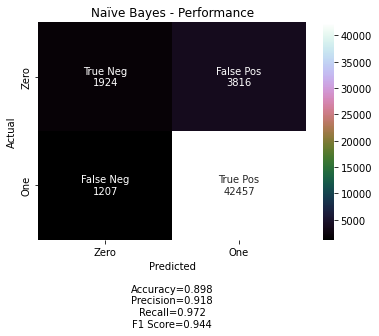

In [ ]:
# Used Gaussian NB on first try, may switch/modify later? -- TRY A DIFFERENT NB? non gaussian
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Plot Confusion Matrix
model_name = 'Naïve Bayes'
cm = confusion_matrix(y_test, nb_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, nb_pred) *100:.2f}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC- 60.25


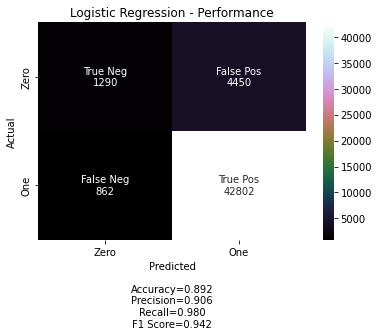

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Plot Confusion Matrix
model_name = 'Logistic Regression'
cm = confusion_matrix(y_test, lr_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, lr_pred) *100:.2f}")

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


AUC- 65.69


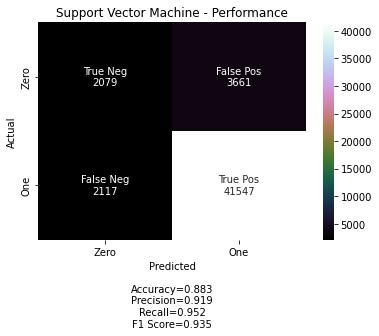

In [ ]:
from sklearn import svm

svc = svm.LinearSVC() # use LinearSVC for faster computation
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# Plot Confusion Matrix
model_name = 'Support Vector Machine'
cm = confusion_matrix(y_test, svc_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, svc_pred) *100:.2f}")

AUC- 69.11


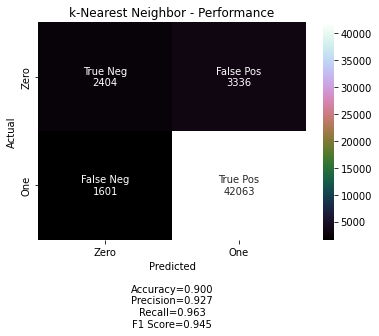

In [ ]:
# Train the model using the training sets
from sklearn.neighbors import KNeighborsClassifier

K=5 #best K from graph and running mods was 2 - tried 5 as OG
kNN = KNeighborsClassifier(n_neighbors=K)
kNN.fit(X_train,y_train)
kNN_pred = kNN.predict(X_test)

# Plot Confusion Matrix
model_name = 'k-Nearest Neighbor'
cm = confusion_matrix(y_test, kNN_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, kNN_pred) *100:.2f}")

In [ ]:
pip install neupy


Main information

[ALGORITHM] LVQ

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 100
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] minstep = 1e-05
[OPTION] n_classes = 2
[OPTION] n_inputs = 22
[OPTION] n_subclasses = 4
[OPTION] n_updates_to_stepdrop = None
[OPTION] prototypes_per_class = None
[OPTION] weight = None


Start training

[TRAINING DATA] shapes: (93562, 22)
[TRAINING] Total epochs: 100

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.11514 |           - |      13 sec |
|         100 |      0.1149 |           - |       3 sec |
---------------------------------------------------------

CPU times: user 6min 1s, sys: 15.4 s, total: 6min 17s
Wall time: 6min 27s


Text(0.5, 1.0, 'Learning Vector Quanitzation - Performance')

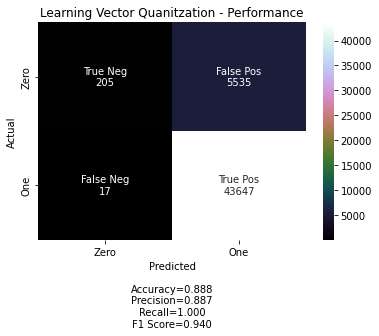

In [ ]:
from neupy import algorithms

lvq = algorithms.LVQ(n_inputs=22 #should be # of features in data?
                       , n_subclasses=4
                       , n_classes=2
                       , step=0.1 #default
                       , show_epoch=100
                       , verbose=True
                        )

%time lvq.train(X_train, y_train, epochs=100)
lvq_pred = lvq.predict(X_test)

# Plot Confusion Matrix
model_name = 'Learning Vector Quanitzation'
cm = confusion_matrix(y_test, lvq_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')

In [ ]:
print(f"AUC- {metrics.roc_auc_score(y_test, lvq_pred) *100:.2f}")

AUC- 51.77


# ROC and PR Curves of our initial models developed without any Data Normalization and Fine Tuning 

In [ ]:
import matplotlib

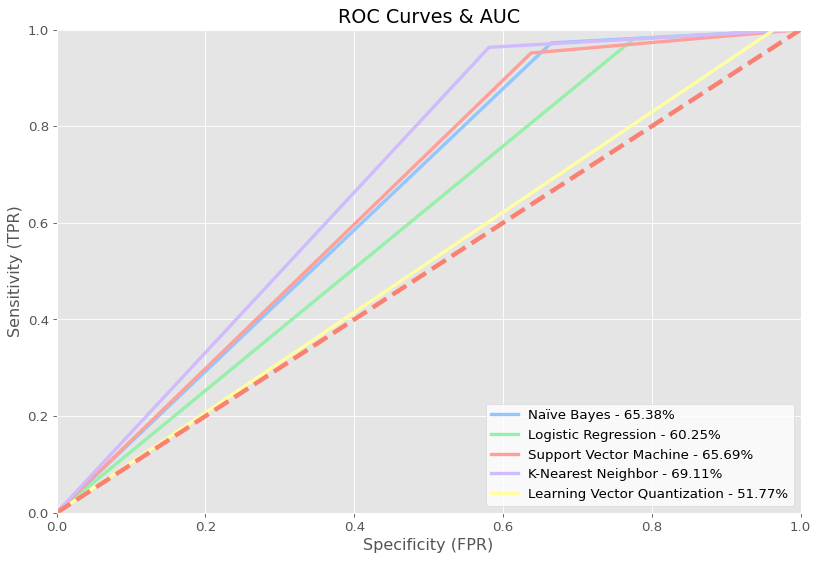

In [ ]:
# ROC Curves
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') #looks nice without as well
plt.style.use('seaborn-pastel')
hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(12, 8), dpi=80)



# Models to Plot -- Add any changes to model to dict_key
models = {'Naïve Bayes':nb_pred
, 'Logistic Regression':lr_pred
, 'Support Vector Machine':svc_pred #change to linear_svc if using linear kernel / add kernel name to classifier
, 'K-Nearest Neighbor':kNN_pred
, 'Learning Vector Quantization':lvq_pred
}

# Below for loop iterates through your models list
for m, pred in models.items():

    # Compute FPR, TPR & AUC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    auc = metrics.roc_auc_score(y_test, pred)

    # Plot Metrics
    plt.plot(fpr, tpr, label=f'{m} - {auc*100:.2f}%', linewidth=3)


# Plot Settings
plt.plot([0, 1], [0, 1], color='salmon', linewidth=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curves & AUC')
plt.legend(loc="lower right", facecolor='white')
plt.show()

<Figure size 960x640 with 0 Axes>

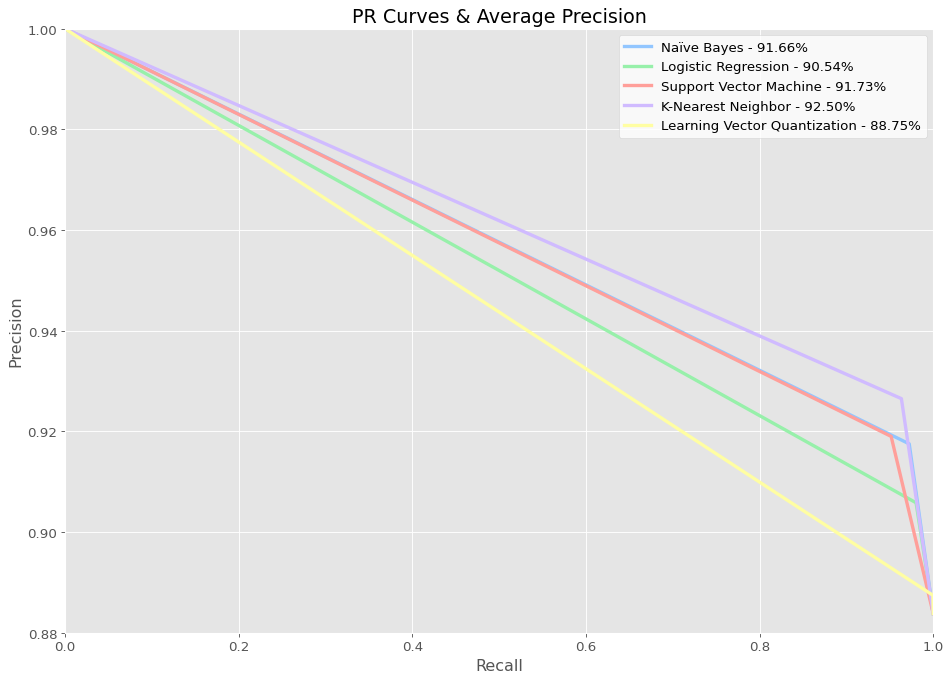

In [ ]:
# PR Curves
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

matplotlib.style.use('ggplot') #looks nice without as well
plt.style.use('seaborn-pastel')
hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(12, 8), dpi=80)
plt.figure(figsize=(14, 10), dpi=80)


# Below for loop iterates through your models list
for m, pred in models.items():

    # Calculate PR for Curves
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    ap = average_precision_score(y_test, pred)
    
    # Plot Metrics
    plt.plot(recall, precision, label=f'{m} - {ap*100:.2f}%', linewidth=3)


# Plot Settings
plt.xlim([0.0, 1.0])
plt.ylim([0.88, 1.0]) #scaled to zoom in on curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curves & Average Precision')
plt.legend(loc="best", facecolor='white')
plt.show()

#Initial Observations
From the initial models we can clearly see that AUC values are very low even though we have very good Accuracy and Precision Scores. 
This is the impact of label imbalance and not normalization of the Data 



# Normalized Models 


*   Used Standard Scaler For Normalization of the data
*   Naive Bayes is Baseline Model for the study



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalizing Data for Modelling (Scaled @ 0 with std dev of 1)
scaler = StandardScaler()
cols = df_train.columns

df_train = scaler.fit_transform(df_train)
df_train = pd.DataFrame(data=df_train)
df_train.columns=cols

df_test = scaler.fit_transform(df_test)
df_test = pd.DataFrame(data=df_test)
df_test.columns=cols

#Naive Bayes Model - Base Model, Normalized Data

AUC- 75.32


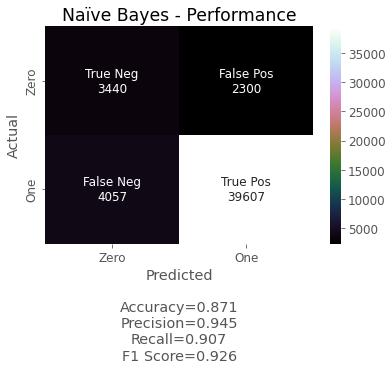

In [ ]:
# Used Gaussian NB on first try, may switch/modify later? -- TRY A DIFFERENT NB? non gaussian
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Plot Confusion Matrix
model_name = 'Naïve Bayes'
cm = confusion_matrix(y_test, nb_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, nb_pred) *100:.2f}")

#Logistic Regression Model


*   First LR Model - Simple Model with Normalized Data
*   Second LR Model - Fine Tuned with Lasso Regression and given weights to labels in order to deal with imbalance 



AUC- 66.81


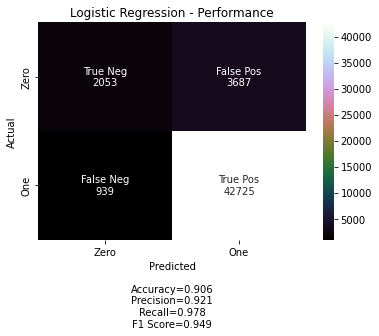

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Plot Confusion Matrix
model_name = 'Logistic Regression'
cm = confusion_matrix(y_test, lr_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, lr_pred) *100:.2f}")

In [ ]:
# GridSearch for Best Params
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='saga')

# Params to tune
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10, 50)
hyperparameters = dict(C=C, penalty=penalty)

# Grid Search
lr = GridSearchCV(lr, hyperparameters, cv=10, verbose=0)

# Best Model
best = lr.fit(X_train, y_train)
print('Best Penalty:', best.best_estimator_.get_params()['penalty']) # l1
print('Best C:', best.best_estimator_.get_params()['C']) # 1.0

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

Best Penalty: l1
Best C: 2.7825594022071245


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


AUC- 72.31


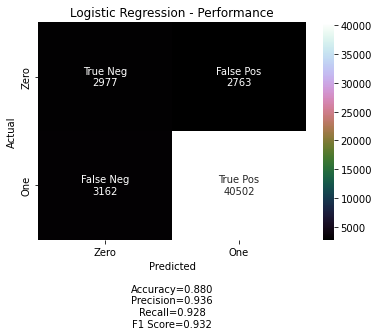

In [ ]:
# Best LR
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(Cs=10 #default and yielded best accuracy in CV
                           , cv=10 #default CV is Stratified K-Folds (will use for later models as well?)
                           , penalty='l1' #lasso
                           , solver='saga' #gradient descent that allows for L1 penalty! -- good for large datasets as well
                           , max_iter=500
                           , class_weight={0:4 , 1:1} #for imbalanced data -- this is us (5,1)

                           , tol=10.0
                           , random_state=7
                           , n_jobs=-1 #use all CPUs for computation
                           , verbose=0)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Plot Confusion Matrix
model_name = 'Logistic Regression'
cm = confusion_matrix(y_test, lr_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, lr_pred) *100:.2f}")

#SVM Models 


*   First model Linear SVM Model built with Normalized Data 
*   Second Model Built on RBF Kernel, did fine tuning resulted in better AUC Values 



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


AUC- 61.66


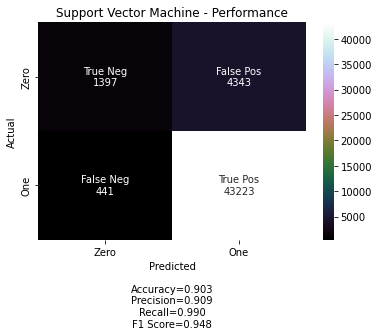

In [ ]:
from sklearn import svm

svc = svm.LinearSVC() # use LinearSVC for faster computation
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# Plot Confusion Matrix
model_name = 'Support Vector Machine'
cm = confusion_matrix(y_test, svc_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, svc_pred) *100:.2f}")

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10,], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)


# print best parameter after tuning
print(grid.best_params_)
print(grid.best_estimator_)

# {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} -- best params

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.881 total time= 9.6min
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.881 total time= 7.8min
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.881 total time= 7.6min
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.881 total time= 7.7min
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.881 total time= 9.9min
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.884 total time= 5.4min
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.884 total time= 5.3min
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.884 total time= 5.2min
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.884 total time= 5.0min
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.884 total time= 5.5min
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.885 total time= 3.3min
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf;

AUC- 65.42


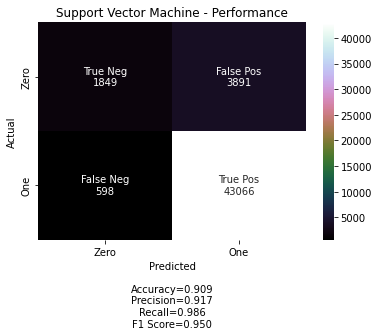

In [ ]:
# Best SVM #
from sklearn import svm

svc = svm.SVC(C=1, gamma=0.1, kernel='rbf')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# Plot Confusion Matrix
model_name = 'Support Vector Machine'
cm = confusion_matrix(y_test, svc_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, svc_pred) *100:.2f}")

#KNN Models 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def trainKnn(X, y, k=1):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X, y)
  pred = model.predict(X)
  accuracy = sum(pred == y) / len(X)    
  return model, accuracy

In [ ]:
def testKnn(model, X, y):
  pred = model.predict(X)
  accuracy = sum(pred == y) / len(X)
  return accuracy 

In [ ]:
	for k in [2,3,5,7,9,11,13]:
		Model_k, Acc_train = trainKnn(X_train, y_train, k)
		Acc_test = testKnn(Model_k, X_test, y_test)
		print('%d-NN --> training accuracy = %.4f  /  test accuracy = %.4f' % (k, Acc_train, Acc_test))

2-NN --> training accuracy = 0.9371  /  test accuracy = 0.8469
3-NN --> training accuracy = 0.9335  /  test accuracy = 0.8963
5-NN --> training accuracy = 0.9228  /  test accuracy = 0.9024
7-NN --> training accuracy = 0.9183  /  test accuracy = 0.9051
9-NN --> training accuracy = 0.9160  /  test accuracy = 0.9064
11-NN --> training accuracy = 0.9135  /  test accuracy = 0.9059
13-NN --> training accuracy = 0.9123  /  test accuracy = 0.9058


From the above we can see that after 5NN the test accuracy is nearly same with K value increase
Using Ocams Razon we can say that K = 5 gives the best and simple classifiaction model based on accuracy on the test data.

Before choosing the best KNN model, lets study Confusion Matrix and AUC Values  for K= 2, K =3, K =4 and K = 5

AUC- 73.95


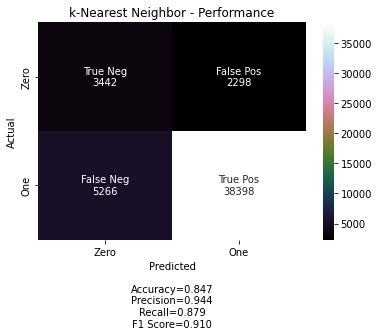

In [ ]:
# Train the model using the training sets
from sklearn.neighbors import KNeighborsClassifier

K=2 
kNN = KNeighborsClassifier(n_neighbors=K)
kNN.fit(X_train,y_train)
kNN_pred = kNN.predict(X_test)

# Plot Confusion Matrix
model_name = 'k-Nearest Neighbor'
cm = confusion_matrix(y_test, kNN_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, kNN_pred) *100:.2f}")

AUC- 68.59


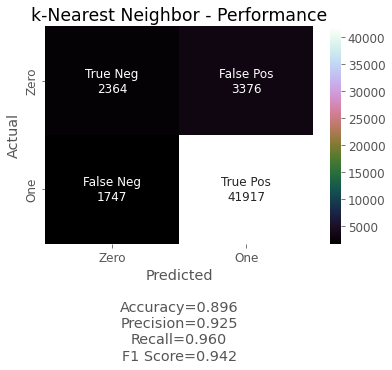

In [ ]:
# Train the model using the training sets
from sklearn.neighbors import KNeighborsClassifier

K=3 
kNN = KNeighborsClassifier(n_neighbors=K)
kNN.fit(X_train,y_train)
kNN_pred = kNN.predict(X_test)

# Plot Confusion Matrix
model_name = 'k-Nearest Neighbor'
cm = confusion_matrix(y_test, kNN_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, kNN_pred) *100:.2f}")

AUC- 72.17


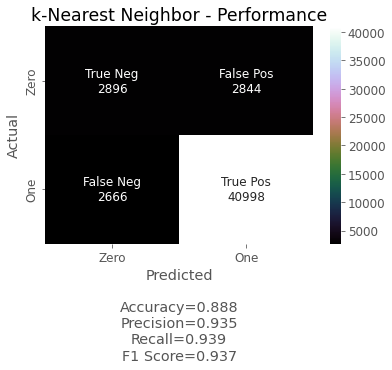

In [ ]:
# Train the model using the training sets
from sklearn.neighbors import KNeighborsClassifier

K=4 
kNN = KNeighborsClassifier(n_neighbors=K)
kNN.fit(X_train,y_train)
kNN_pred = kNN.predict(X_test)

# Plot Confusion Matrix
model_name = 'k-Nearest Neighbor'
cm = confusion_matrix(y_test, kNN_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, kNN_pred) *100:.2f}")

AUC- 68.28


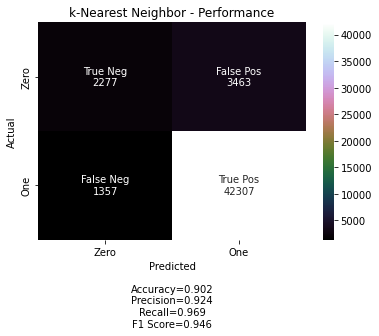

In [ ]:
# Train the model using the training sets
from sklearn.neighbors import KNeighborsClassifier

K=5 
kNN = KNeighborsClassifier(n_neighbors=K)
kNN.fit(X_train,y_train)
kNN_pred = kNN.predict(X_test)

# Plot Confusion Matrix
model_name = 'k-Nearest Neighbor'
cm = confusion_matrix(y_test, kNN_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_test, kNN_pred) *100:.2f}")

If we compare all the K Models in K=2, K=3, K=4 and K= 5, Precision and AUC is the highest for K = 2 even though a slight less accuracy.



**Based on this observation we choose K =2 because of High AUC and Precision values**





# LVQ Model 


*   Initial Simple LVQ Model with Data Normalization and No Fine Tuning
*   Final LVQ Model, with fine tuning 




Main information

[ALGORITHM] LVQ

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 100
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] minstep = 1e-05
[OPTION] n_classes = 2
[OPTION] n_inputs = 22
[OPTION] n_subclasses = 4
[OPTION] n_updates_to_stepdrop = None
[OPTION] prototypes_per_class = None
[OPTION] weight = None


Start training

[TRAINING DATA] shapes: (93562, 22)
[TRAINING] Total epochs: 100

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.11541 |           - |       3 sec |
|         100 |     0.11516 |           - |       3 sec |
---------------------------------------------------------

CPU times: user 6min 17s, sys: 26.6 s, total: 6min 44s
Wall time: 6min 19s


Text(0.5, 1.0, 'Learning Vector Quanitzation - Performance')

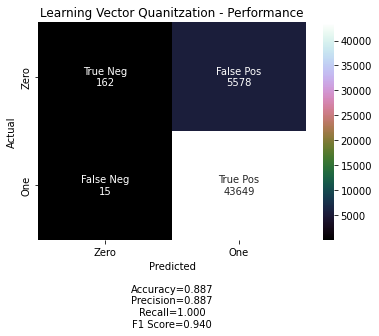

In [ ]:
from neupy import algorithms

lvq = algorithms.LVQ(n_inputs=22 #should be # of features in data?
                       , n_subclasses=4
                       , n_classes=2
                       , step=0.1 #default
                       , show_epoch=100
                       , verbose=True
                        )

%time lvq.train(X_train, y_train, epochs=100)
lvq_pred = lvq.predict(X_test)

# Plot Confusion Matrix
model_name = 'Learning Vector Quanitzation'
cm = confusion_matrix(y_test, lvq_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')

## Learning Vector Quantization (LVQ)
LVQ from Library -- http://neupy.com/apidocs/neupy.algorithms.competitive.lvq.html


<BR>

Performance:
<BR>
Inputs = 22
Epochs = 100
- 88.7% Accuracy & 88.7% Precision (Not Normalized)
- 88.7% Accuracy & 88.7% Precision (Normalized)

<BR>

Inputs = 22
n_subclasses = 8 (up from 2 in above)
Epochs = 100
- 89.7% Accuracy & 89.8% Precision (Not Normalized)
- 88.8% Accuracy & 88.7% Precision (Normalized)

n_subclasses = 16 & step=.8
- with these metrics saw naive Performance of AUC = .5

n_subclasses = 18 & step=.001
- with these metrics saw naive Performance of AUC = 68.18

n_subclasses = 18 & step=.001 & epoch=300
- with these metrics saw naive Performance of AUC = 70.09

n_subclasses = 20 & step=.001 & epoch=500
- with these metrics saw naive Performance of AUC = 70.11

epochs @ 800 yielded >69.8% AUC

n_subclasses = 18 & step=.001 & epoch=400
- with these metrics saw naive Performance of AUC = 70.14

n_subclasses = 18 & step=.001 & epoch=500
- with these metrics saw naive Performance of AUC = 68.28

#### BEST:

n_subclasses = 18 & step=.001 & epoch=400
- with these metrics saw naive Performance of AUC = 70.14


Main information

[ALGORITHM] LVQ

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 100
[OPTION] shuffle_data = False
[OPTION] step = 0.001
[OPTION] train_end_signal = None
[OPTION] minstep = 1e-05
[OPTION] n_classes = 2
[OPTION] n_inputs = 22
[OPTION] n_subclasses = 20
[OPTION] n_updates_to_stepdrop = None
[OPTION] prototypes_per_class = None
[OPTION] weight = None


Start training

[TRAINING DATA] shapes: (93562, 22)
[TRAINING] Total epochs: 400

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.16679 |           - |       3 sec |
|         100 |     0.10163 |           - |       3 sec |
|         200 |     0.10167 |           - |       3 sec |
|         300 |     0.10164 |           - |       3 sec |
|         400 |     0.10163 |           - |       3 sec |
----------------------------------------------------

Text(0.5, 1.0, 'Learning Vector Quanitzation - Performance')

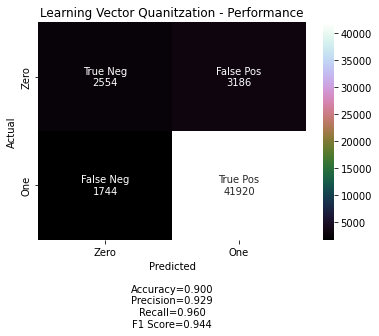

In [ ]:
# Best LVQ
from neupy import algorithms

lvq = algorithms.LVQ(n_inputs=22 #should be # of features in data?
                       , n_subclasses=20
                       , n_classes=2
                       , step=0.001
                       , show_epoch=100
                       , verbose=True
                        )

%time lvq.train(X_train, y_train, epochs=400)
lvq_pred = lvq.predict(X_test)

# Plot Confusion Matrix
model_name = 'Learning Vector Quanitzation'
cm = confusion_matrix(y_test, lvq_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')

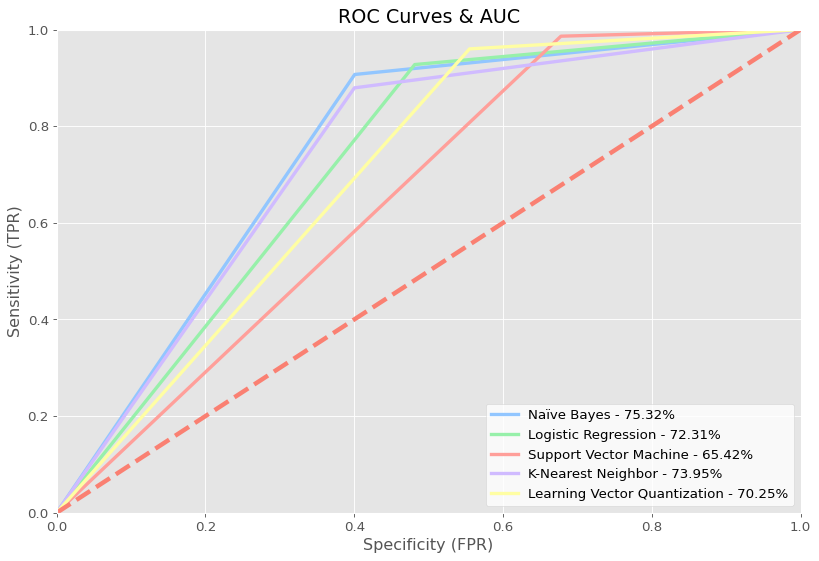

In [ ]:
# ROC Curves
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') #looks nice without as well
plt.style.use('seaborn-pastel')
hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(12, 8), dpi=80)



# Models to Plot -- Add any changes to model to dict_key
models = {'Naïve Bayes':nb_pred
, 'Logistic Regression':lr_pred
, 'Support Vector Machine':svc_pred #change to linear_svc if using linear kernel / add kernel name to classifier
, 'K-Nearest Neighbor':kNN_pred
, 'Learning Vector Quantization':lvq_pred
}

# Below for loop iterates through your models list
for m, pred in models.items():

    # Compute FPR, TPR & AUC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    auc = metrics.roc_auc_score(y_test, pred)

    # Plot Metrics
    plt.plot(fpr, tpr, label=f'{m} - {auc*100:.2f}%', linewidth=3)


# Plot Settings
plt.plot([0, 1], [0, 1], color='salmon', linewidth=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curves & AUC')
plt.legend(loc="lower right", facecolor='white')
plt.show()

<Figure size 960x640 with 0 Axes>

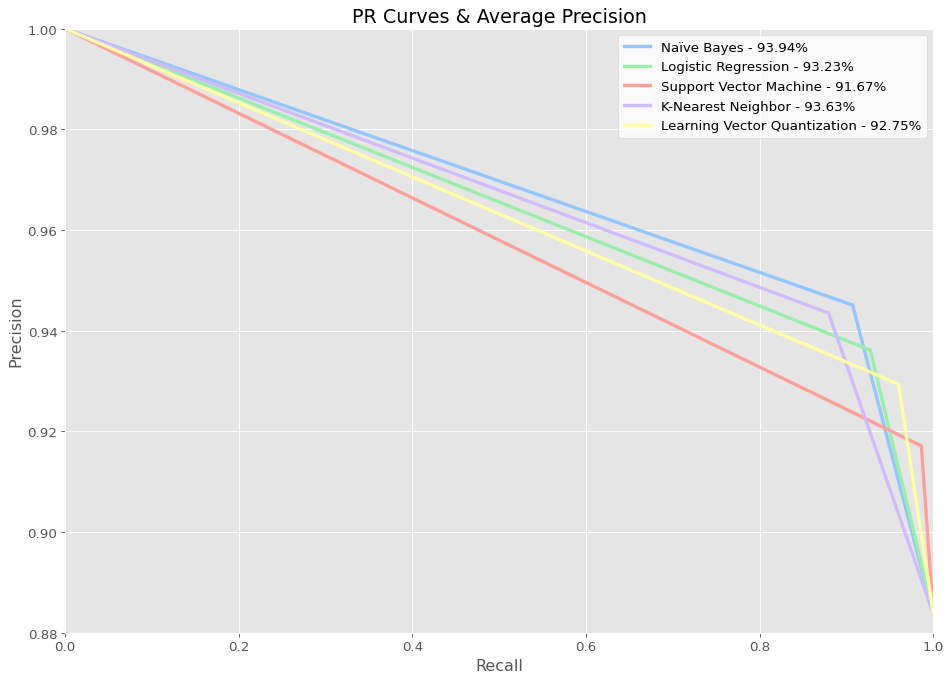

In [ ]:
# PR Curves
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

matplotlib.style.use('ggplot') #looks nice without as well
plt.style.use('seaborn-pastel')
hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(12, 8), dpi=80)
plt.figure(figsize=(14, 10), dpi=80)


# Below for loop iterates through your models list
for m, pred in models.items():

    # Calculate PR for Curves
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    ap = average_precision_score(y_test, pred)
    
    # Plot Metrics
    plt.plot(recall, precision, label=f'{m} - {ap*100:.2f}%', linewidth=3)


# Plot Settings
plt.xlim([0.0, 1.0])
plt.ylim([0.88, 1.0]) #scaled to zoom in on curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curves & Average Precision')
plt.legend(loc="best", facecolor='white')
plt.show()

# Dealing with Label Imbalances


*   Used smote to populate the minority label
*   50-50 Labels after applying the smote 




In [ ]:
from imblearn.over_sampling import SMOTE

# define the SMOTE method
smote = SMOTE(sampling_strategy='minority')

# apply SMOTE to the dataset
X_smotedT, y_smotedT = smote.fit_resample(X_train, y_train)
X_smotedTest, y_smotedTest = smote.fit_resample(X_test, y_test)
print(f"X_train- {X_smotedT.shape}", '\n', f"X_test- {X_smotedTest.shape}")

X_train- (164928, 22) 
 X_test- (87328, 22)


In [ ]:
y_smotedT

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# use np.unique to find the unique values in the array
unique, counts = np.unique(y_smotedT, return_counts=True)

# use np.bincount to count the occurrences of each value
counts = np.bincount(y_smotedT)

# print the counts
print(unique)
print(counts)


[0 1]
[82464 82464]


AUC- 77.97


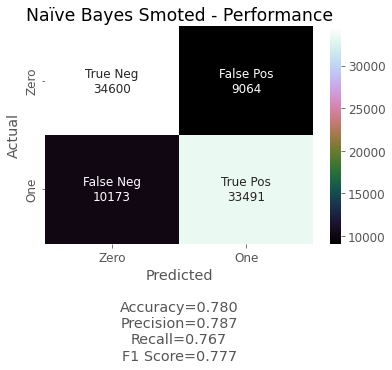

In [ ]:
# Used Gaussian NB on first try, may switch/modify later? -- TRY A DIFFERENT NB? non gaussian
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_smotedT, y_smotedT)
nb_pred = nb.predict(X_smotedTest)

# Plot Confusion Matrix
model_name = 'Naïve Bayes Smoted'
cm = confusion_matrix(y_smotedTest, nb_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_smotedTest, nb_pred) *100:.2f}")

AUC- 79.99


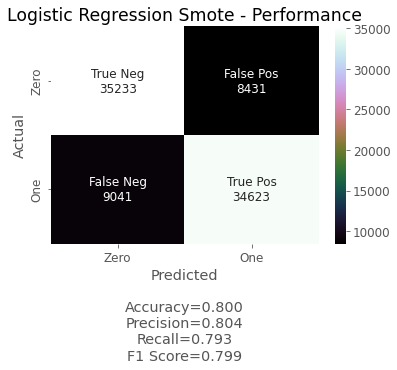

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_smotedT, y_smotedT)
lr_pred = lr.predict(X_smotedTest)

# Plot Confusion Matrix
model_name = 'Logistic Regression Smote'
cm = confusion_matrix(y_smotedTest, lr_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_smotedTest, lr_pred) *100:.2f}")


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


AUC- 79.89


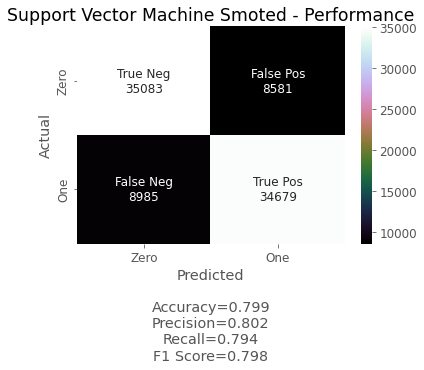

In [ ]:
from sklearn import svm

svc = svm.LinearSVC() # use LinearSVC for faster computation
svc.fit(X_smotedT, y_smotedT)
svc_pred = svc.predict(X_smotedTest)

# Plot Confusion Matrix
model_name = 'Support Vector Machine Smoted'
cm = confusion_matrix(y_smotedTest, svc_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_smotedTest, svc_pred) *100:.2f}")



In [ ]:
	for k in [2,3,4,5,7,9,11,13]:
		Model_k, Acc_train = trainKnn(X_smotedT, y_smotedT, k)
		Acc_test = testKnn(Model_k, X_smotedTest, y_smotedTest)
		print('%d-NN --> training accuracy = %.4f  /  test accuracy = %.4f' % (k, Acc_train, Acc_test))

KeyboardInterrupt: ignored

AUC- 77.57


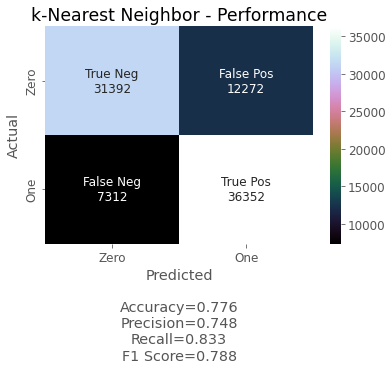

In [ ]:
# Train the model using the training sets
from sklearn.neighbors import KNeighborsClassifier

K=5 
kNN = KNeighborsClassifier(n_neighbors=K)
kNN.fit(X_smotedT,y_smotedT)
kNN_pred = kNN.predict(X_smotedTest)

# Plot Confusion Matrix
model_name = 'k-Nearest Neighbor'
cm = confusion_matrix(y_smotedTest, kNN_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')
print(f"AUC- {metrics.roc_auc_score(y_smotedTest, kNN_pred) *100:.2f}")


Main information

[ALGORITHM] LVQ

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 100
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] minstep = 1e-05
[OPTION] n_classes = 2
[OPTION] n_inputs = 22
[OPTION] n_subclasses = 4
[OPTION] n_updates_to_stepdrop = None
[OPTION] prototypes_per_class = None
[OPTION] weight = None


Start training

[TRAINING DATA] shapes: (164928, 22)
[TRAINING] Total epochs: 100

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |    0.065556 |           - |       6 sec |
|         100 |    0.067278 |           - |       6 sec |
---------------------------------------------------------

CPU times: user 10min 22s, sys: 29.2 s, total: 10min 52s
Wall time: 10min 24s


Text(0.5, 1.0, 'Learning Vector Quanitzation - Performance')

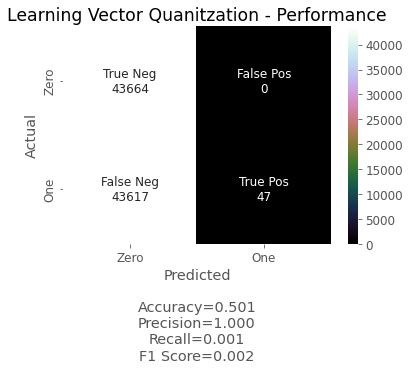

In [ ]:
from neupy import algorithms

lvq = algorithms.LVQ(n_inputs=22 #should be # of features in data?
                       , n_subclasses=4
                       , n_classes=2
                       , step=0.1 #default
                       , show_epoch=100
                       , verbose=True
                        )

%time lvq.train(X_smotedT, y_smotedT, epochs=100)
lvq_pred = lvq.predict(X_smotedTest)

# Plot Confusion Matrix
model_name = 'Learning Vector Quanitzation'
cm = confusion_matrix(y_smotedTest, lvq_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cm, group_names=labels, categories=categories, percent=False, cmap='cubehelix')
plt.title(f'{model_name} - Performance')

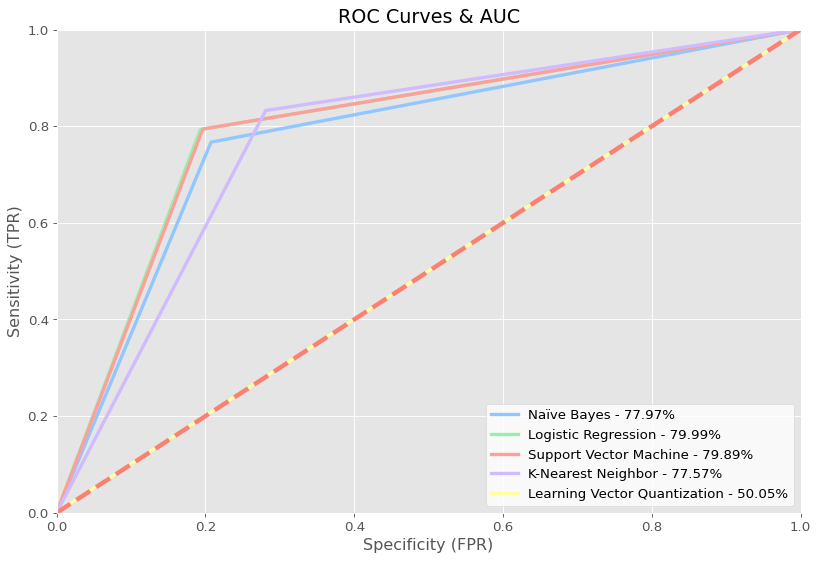

In [ ]:
# ROC Curves
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') #looks nice without as well
plt.style.use('seaborn-pastel')
hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(12, 8), dpi=80)



# Models to Plot -- Add any changes to model to dict_key
models = {'Naïve Bayes':nb_pred
, 'Logistic Regression':lr_pred
, 'Support Vector Machine':svc_pred #change to linear_svc if using linear kernel / add kernel name to classifier
, 'K-Nearest Neighbor':kNN_pred
, 'Learning Vector Quantization':lvq_pred
}

# Below for loop iterates through your models list
for m, pred in models.items():

    # Compute FPR, TPR & AUC
    fpr, tpr, thresholds = metrics.roc_curve(y_smotedTest, pred)
    auc = metrics.roc_auc_score(y_smotedTest, pred)

    # Plot Metrics
    plt.plot(fpr, tpr, label=f'{m} - {auc*100:.2f}%', linewidth=3)


# Plot Settings
plt.plot([0, 1], [0, 1], color='salmon', linewidth=4, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curves & AUC')
plt.legend(loc="lower right", facecolor='white')
plt.show()

<Figure size 960x640 with 0 Axes>

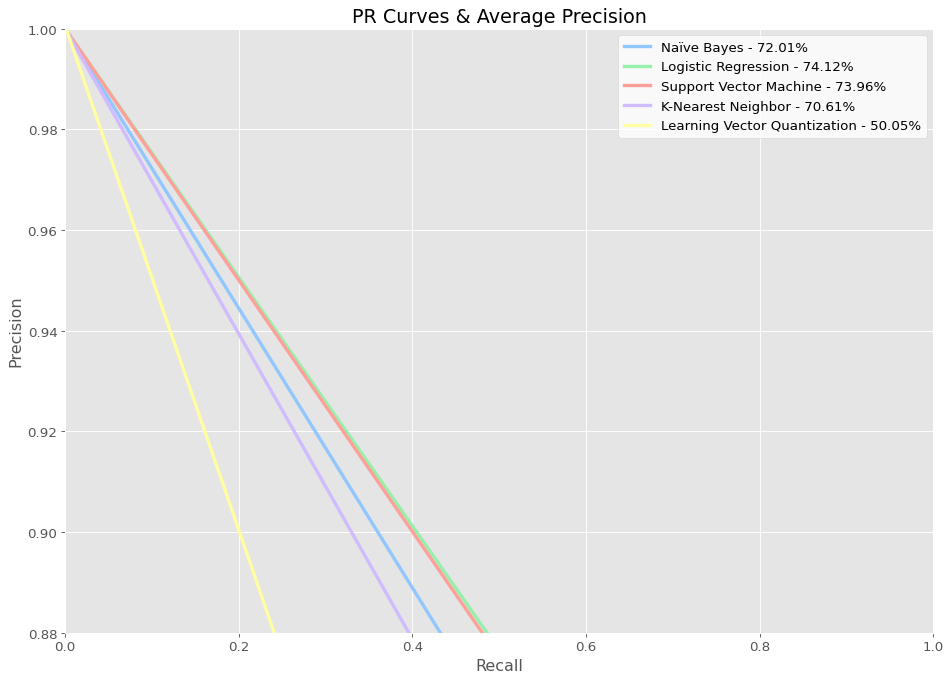

In [ ]:
# PR Curves
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

matplotlib.style.use('ggplot') #looks nice without as well
plt.style.use('seaborn-pastel')
hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(12, 8), dpi=80)
plt.figure(figsize=(14, 10), dpi=80)


# Below for loop iterates through your models list
for m, pred in models.items():

    # Calculate PR for Curves
    precision, recall, thresholds = precision_recall_curve(y_smotedTest, pred)
    ap = average_precision_score(y_smotedTest, pred)
    
    # Plot Metrics
    plt.plot(recall, precision, label=f'{m} - {ap*100:.2f}%', linewidth=3)


# Plot Settings
plt.xlim([0.0, 1.0])
plt.ylim([0.88, 1.0]) #scaled to zoom in on curve
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curves & Average Precision')
plt.legend(loc="best", facecolor='white')
plt.show()